<a href="https://colab.research.google.com/github/JangAyeon/TIL/blob/main/6_2_understanding_recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__

'2.6.0'

# **Understading recurrent neural networks**

In [18]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

from keras.datasets import imdb
from keras.preprocessing import sequence

import matplotlib.pyplot as plt

In [5]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
max_features=10000 #특성으로 사용할 단어의 수
maxlen=500 #사용할 텍스트 길이 (가장 빈번한 max_features개 단어만 사용)
batch_size=32

print("데이터 로딩 중 ...")
(input_train, y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)
print(len(input_train),"훈련 시퀀스")
print(len(input_test),"테스트 시퀀스")

print("시퀀스 패딩 (samples x times)")
input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)
print("input_train 크기 : ", input_train.shape)
print("input_test 크기 : ", input_test.shape)

데이터 로딩 중 ...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x times)
input_train 크기 :  (25000, 500)
input_test 크기 :  (25000, 500)


In [12]:
model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history=model.fit(input_train, y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 179ms/step - loss: 0.6822 - acc: 0.5519 - val_loss: 0.6551 - val_acc: 0.6128
Epoch 2/10
157/157 [==============================] - 25s 157ms/step - loss: 0.5059 - acc: 0.7573 - val_loss: 0.4107 - val_acc: 0.8238
Epoch 3/10
157/157 [==============================] - 25s 157ms/step - loss: 0.3346 - acc: 0.8619 - val_loss: 0.5016 - val_acc: 0.7546
Epoch 4/10
157/157 [==============================] - 25s 160ms/step - loss: 0.2293 - acc: 0.9103 - val_loss: 0.4587 - val_acc: 0.8066
Epoch 5/10
157/157 [==============================] - 25s 159ms/step - loss: 0.1560 - acc: 0.9438 - val_loss: 0.3964 - val_acc: 0.8556
Epoch 6/10
157/157 [==============================] - 25s 161ms/step - loss: 0.0975 - acc: 0.9678 - val_loss: 0.5079 - val_acc: 0.8162
Epoch 7/10
157/157 [==============================] - 25s 157ms/step - loss: 0.0567 - acc: 0.9831 - val_loss: 0.6276 - val_acc: 0.7944
Epoch 8/10
157/157 [==============================] - 2

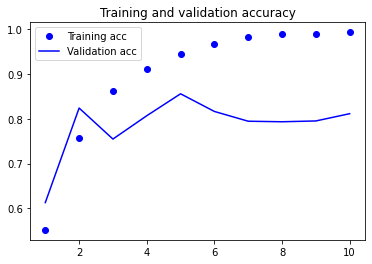

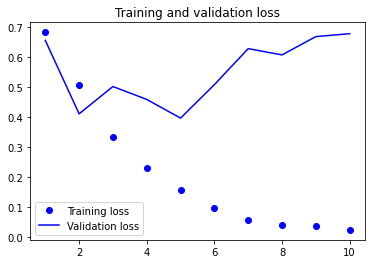

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **케라스를 사용한 LSTM 예제**

In [20]:
from keras.layers import LSTM

In [21]:
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))

In [22]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])
history=model.fit(input_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 343ms/step - loss: 0.5201 - acc: 0.7562 - val_loss: 0.3861 - val_acc: 0.8420
Epoch 2/10
157/157 [==============================] - 55s 352ms/step - loss: 0.3108 - acc: 0.8778 - val_loss: 0.2895 - val_acc: 0.8798
Epoch 3/10
157/157 [==============================] - 54s 345ms/step - loss: 0.2431 - acc: 0.9064 - val_loss: 0.2796 - val_acc: 0.8842
Epoch 4/10
157/157 [==============================] - 53s 341ms/step - loss: 0.2050 - acc: 0.9253 - val_loss: 0.2806 - val_acc: 0.8884
Epoch 5/10
157/157 [==============================] - 53s 341ms/step - loss: 0.1782 - acc: 0.9356 - val_loss: 0.3152 - val_acc: 0.8724
Epoch 6/10
157/157 [==============================] - 53s 338ms/step - loss: 0.1598 - acc: 0.9423 - val_loss: 0.4068 - val_acc: 0.8192
Epoch 7/10
157/157 [==============================] - 54s 342ms/step - loss: 0.1478 - acc: 0.9474 - val_loss: 0.3747 - val_acc: 0.8406
Epoch 8/10
157/157 [==============================] - 5

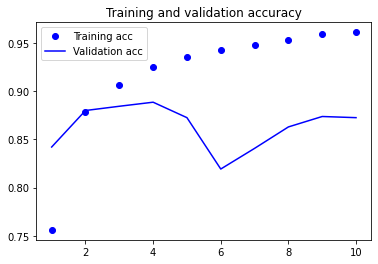

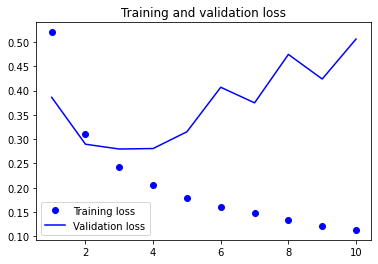

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()